<a href="https://colab.research.google.com/github/rapu34/Crime-Type-Classification-AI/blob/main/Crime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
df = pd.read_csv('/content/drive/MyDrive/open (1)/train.csv')
df

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,TRAIN_84401,4,일요일,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,1
84402,TRAIN_84402,8,목요일,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,0
84403,TRAIN_84403,7,일요일,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
84404,TRAIN_84404,1,화요일,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,주거지,1


In [5]:
df.drop(['ID'], axis=1)

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,화요일,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,11,화요일,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,8,일요일,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,5,월요일,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,9,일요일,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,일요일,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,1
84402,8,목요일,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,0
84403,7,일요일,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
84404,1,화요일,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,주거지,1


In [6]:
df.isnull().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [7]:
df.max()


ID         TRAIN_84405
월                   12
요일                 화요일
시간                  12
소관경찰서             2450
소관지역              54.0
사건발생거리        4.998936
강수량(mm)        614.875
강설량(mm)          295.0
적설량(cm)          649.8
풍향               360.0
안개                 1.0
짙은안개               1.0
번개                 1.0
진눈깨비               1.0
서리                 1.0
연기/연무              1.0
눈날림                1.0
범죄발생지            호텔/모텔
TARGET               2
dtype: object

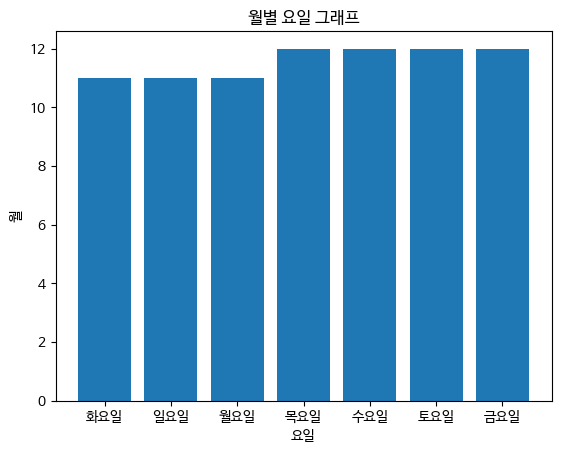

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
# 그래프 그리기
plt.bar(df['요일'], df['월'])
plt.xlabel('요일')
plt.ylabel('월')
plt.title('월별 요일 그래프')
plt.show()
# 딱히 요일별로 범죄 차이는 없다 ->범죄 유형은 차이가 있을까?


In [ ]:
plt.bar(df['요일'], df['Target'])
plt.xlabel('요일')
plt.ylabel('월')
plt.title('월별 요일 그래프')
plt.show()


<ipython-input-16-cec28b3a6d5e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

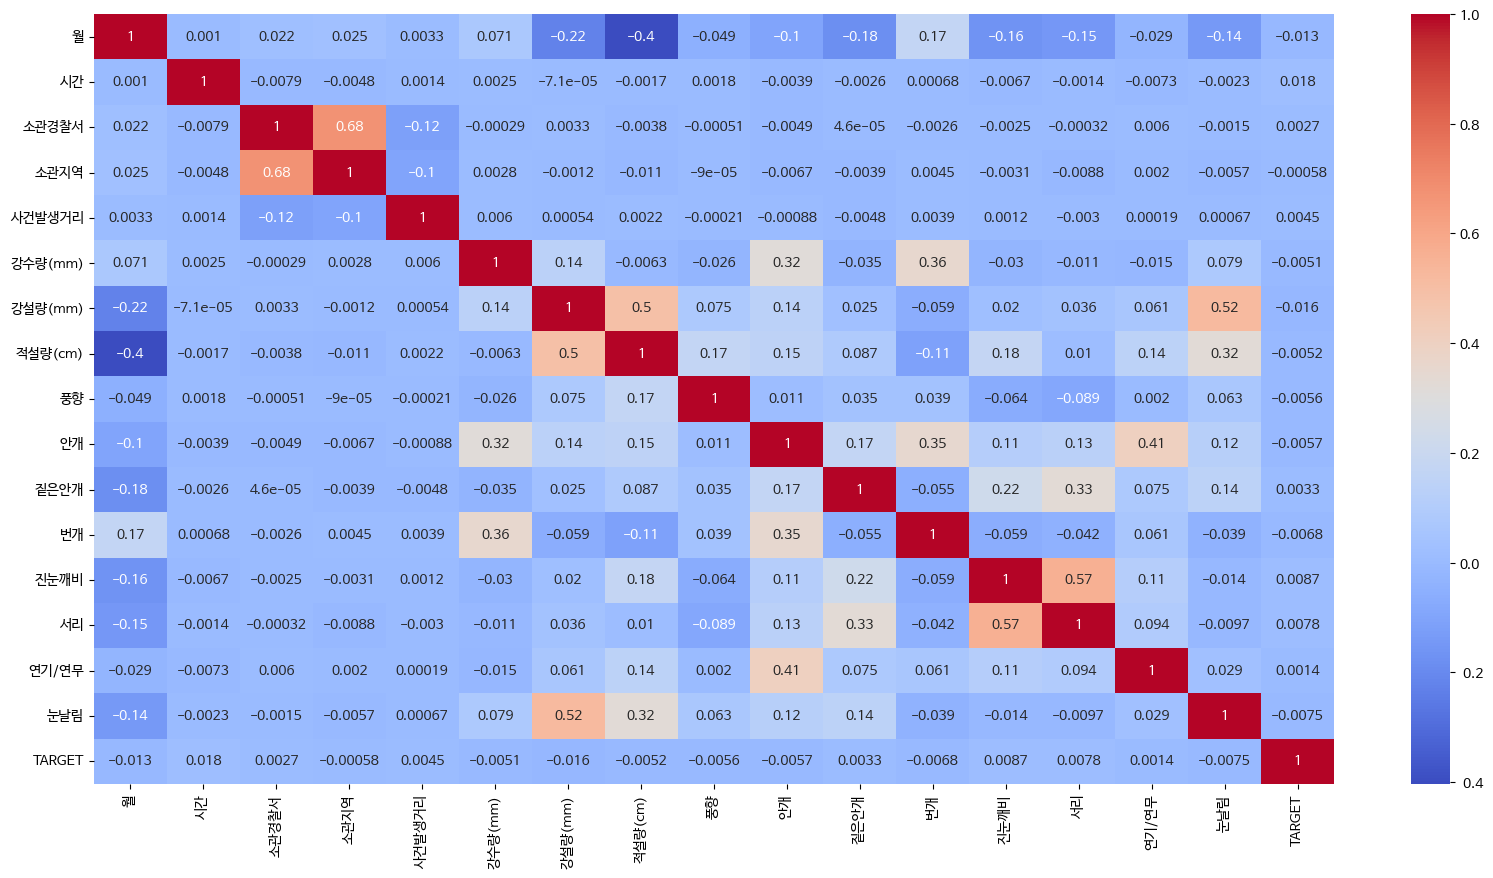

In [ ]:
# target과 각 칼럼간의 상관관계를 확인해보고자 했으나 딱히 관련 없어보임.
plt.figure(figsize=(20,10))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<ipython-input-26-68b2c44f8f7a>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_selected.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


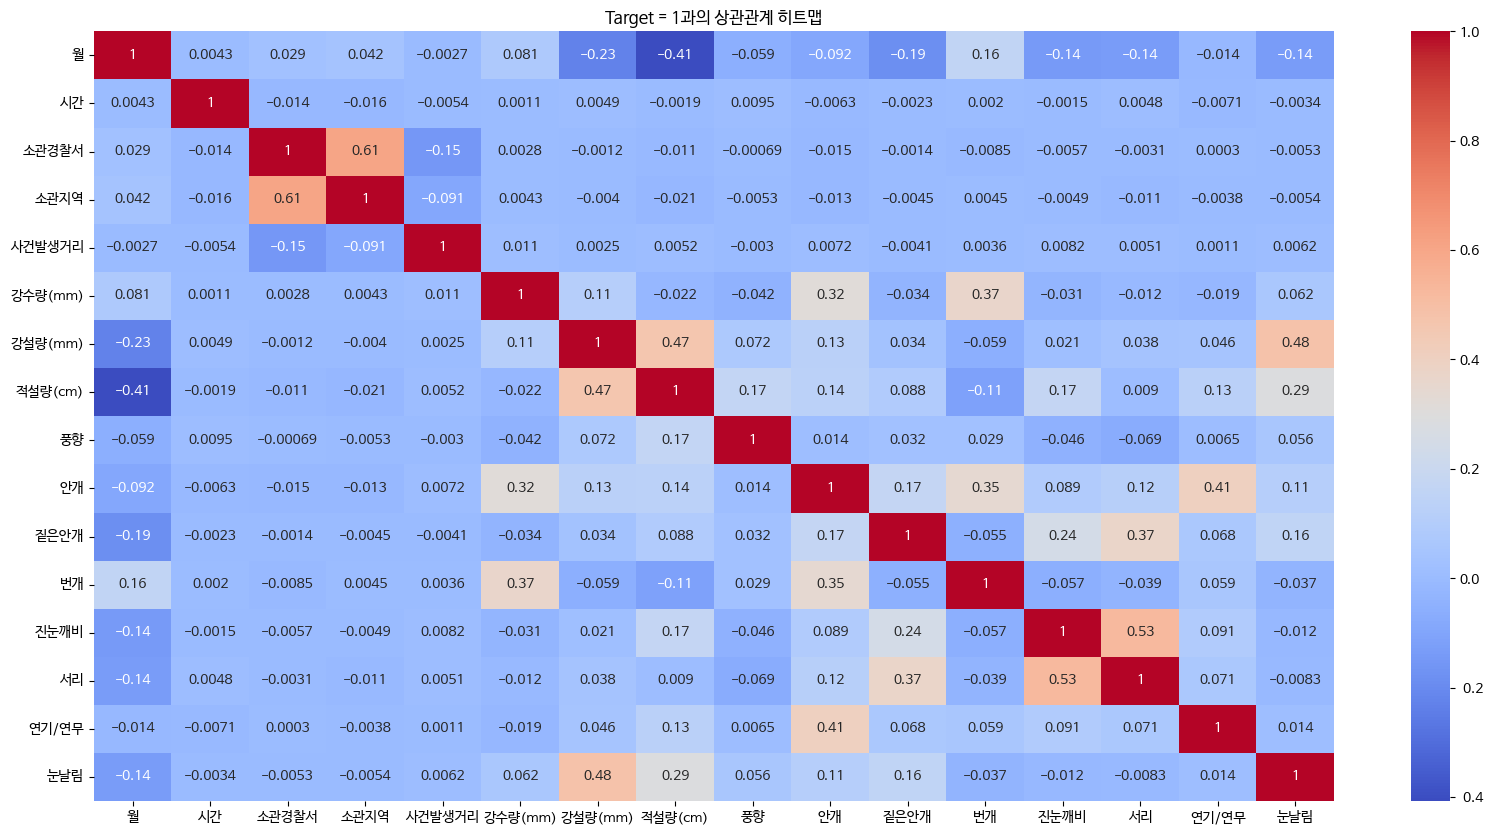

In [ ]:
# target 0,1,2로 나눠서 상관관계 확인->뭔뜻인지 모르겠어서 아래 데이터 프레임을 아예 0,1,2로 나눌 생각

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 분석 대상 칼럼 선택
target_column = 'TARGET'
crime_columns = ['월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)', '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림']

# 선택한 칼럼들로 새로운 DataFrame 생성
df_selected = df[df[target_column] == 1][crime_columns]

# 상관관계 계산
correlation_matrix = df_selected.corr()

# Heatmap 그리기
plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f'Target = 1과의 상관관계 히트맵')
plt.show()

In [ ]:
df_target_0 = df[df['TARGET'] == 0]
df_target_1 = df[df['TARGET'] == 1]
df_target_2 = df[df['TARGET'] == 2]

In [ ]:
df_target_0

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
5,TRAIN_00005,5,화요일,8,447,13.0,2.037493,4.125000,0.0,0.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
7,TRAIN_00007,6,수요일,11,1527,45.0,3.568574,1.000000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
12,TRAIN_00012,9,일요일,12,546,10.0,2.160635,0.000000,0.0,0.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
16,TRAIN_00016,6,화요일,12,1438,41.0,1.291232,2.428571,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84396,TRAIN_84396,8,금요일,10,226,24.0,1.927784,3.125000,0.0,0.0,185.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,공원,0
84400,TRAIN_84400,8,화요일,7,747,22.0,2.477068,0.000000,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
84402,TRAIN_84402,8,목요일,12,2149,38.0,1.458490,0.000000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,0
84403,TRAIN_84403,7,일요일,6,29,46.0,2.944913,105.888889,0.0,0.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0


<ipython-input-52-cc97a8908dd1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_target_0.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


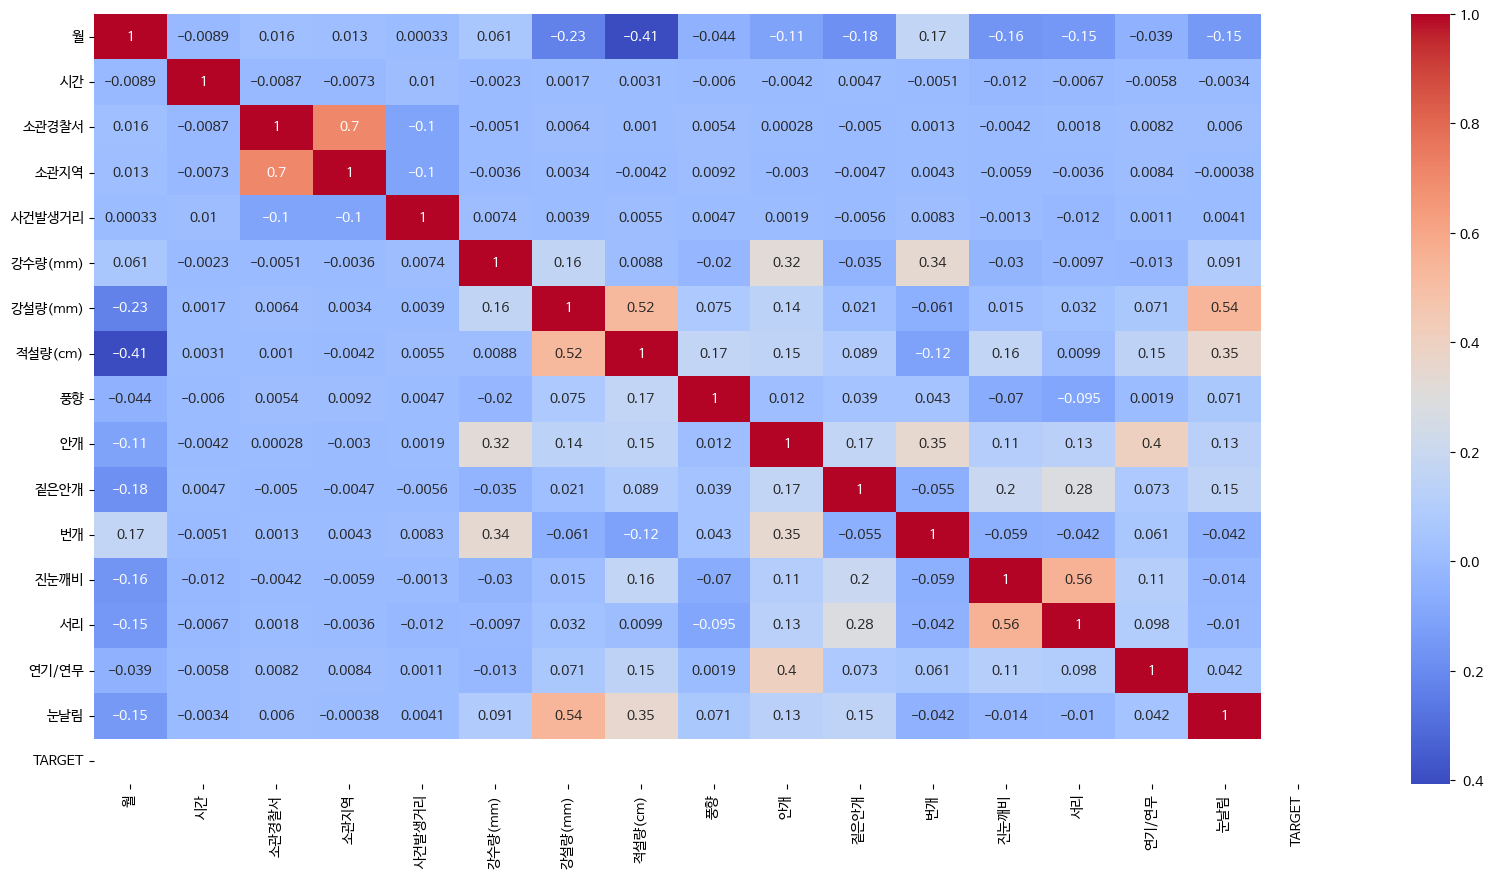

In [ ]:
plt.figure(figsize=(20,10))

correlation_matrix = df_target_0.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
# 'TARGET'이 0인 경우에 대한 데이터프레임 생성
df_target_0 = df[df['TARGET'] == 0]

# 'TARGET'이 0인 경우와 다른 칼럼들 간의 상관관계 계산
correlation_target_0 = df_target_0.corr(numeric_only=True)['TARGET']

# 'TARGET'과의 상관관계가 높은 순으로 정렬
correlation_target_0 = correlation_target_0.sort_values(ascending=False)

# 상관관계 출력
print(correlation_target_0)

월         NaN
시간        NaN
소관경찰서     NaN
소관지역      NaN
사건발생거리    NaN
강수량(mm)   NaN
강설량(mm)   NaN
적설량(cm)   NaN
풍향        NaN
안개        NaN
짙은안개      NaN
번개        NaN
진눈깨비      NaN
서리        NaN
연기/연무     NaN
눈날림       NaN
TARGET    NaN
Name: TARGET, dtype: float64


In [ ]:
df_target_1

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
6,TRAIN_00006,8,목요일,8,1846,36.0,2.321947,3.250000,0.0,0.00,120.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,차도,1
10,TRAIN_00010,5,월요일,8,346,14.0,1.062275,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
13,TRAIN_00013,6,토요일,8,329,12.0,3.014799,0.625000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주차장,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84395,TRAIN_84395,5,금요일,9,2328,44.0,1.466624,0.000000,0.0,0.00,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,백화점,1
84398,TRAIN_84398,3,토요일,4,1147,29.0,1.655599,0.000000,0.0,0.00,145.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,백화점,1
84399,TRAIN_84399,10,월요일,7,2450,31.0,2.707214,19.555556,0.0,0.00,25.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,1
84401,TRAIN_84401,4,일요일,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,1


<ipython-input-56-3fc7c85f6022>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_target_1.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


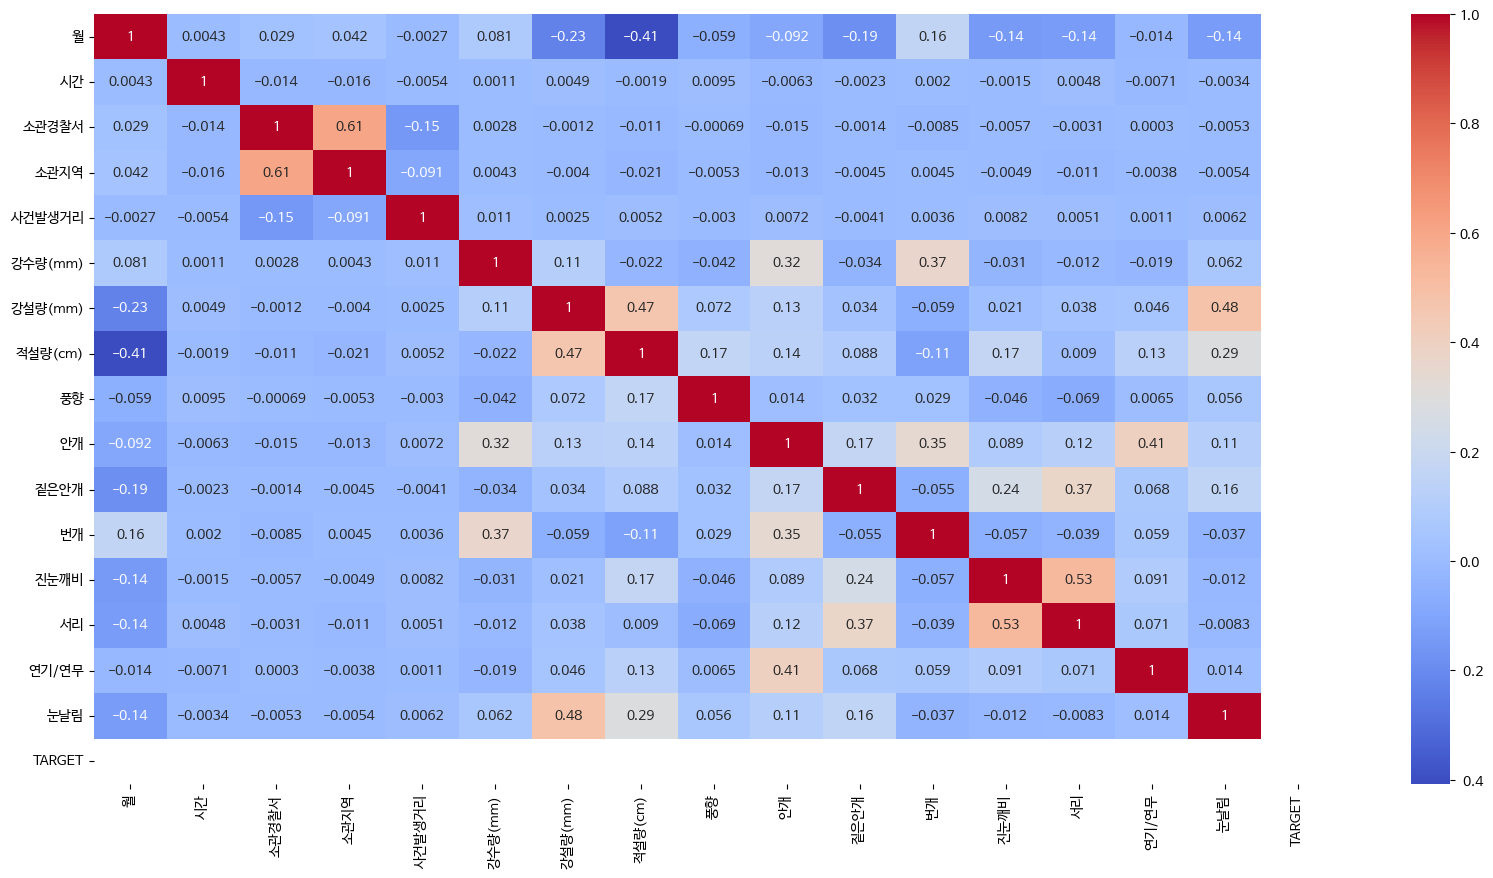

In [ ]:
plt.figure(figsize=(20,10))

correlation_matrix = df_target_1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
df_target_2

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000000,0.0,0.000000,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000000,0.0,0.000000,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2
8,TRAIN_00008,9,수요일,2,1526,45.0,3.805744,0.000000,0.0,0.000000,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,2
9,TRAIN_00009,7,월요일,2,1747,46.0,1.453440,0.000000,0.0,0.000000,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
11,TRAIN_00011,1,일요일,9,1347,36.0,1.631310,2.571429,1.5,4.333333,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84384,TRAIN_84384,10,월요일,11,648,10.0,1.349044,614.875000,0.0,0.000000,30.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,차도,2
84389,TRAIN_84389,9,화요일,12,336,11.0,4.297335,0.000000,0.0,0.000000,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
84392,TRAIN_84392,1,토요일,9,428,38.0,2.219174,0.000000,0.0,8.333333,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,2
84393,TRAIN_84393,5,월요일,7,650,21.0,2.335649,25.200000,0.0,0.000000,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2


In [ ]:
month_mode = df_target_0['요일'].iloc[0]
print("월의 최빈값:", month_mode)
month_mode = df_target_1['요일'].iloc[0]
print("월의 최빈값:", month_mode)
month_mode = df_target_2['요일'].iloc[0]
print("월의 최빈값:", month_mode)

월의 최빈값: 화요일
월의 최빈값: 일요일
월의 최빈값: 화요일


In [ ]:
# target끼리 나눠났으니 target과 다른 칼럼간의 상관관계는 다 1임 즉 의미가없음

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/open (1)/train.csv')
test = pd.read_csv('/content/drive/MyDrive/open (1)/test.csv')

In [6]:
# 데이터 전처리
x_train = train.drop(['ID', 'TARGET'], axis=1)
y_train = train['TARGET']
x_test = test.drop('ID', axis=1)

# 범주형 변수 인코딩
categorical_features = ['월', '요일', '소관경찰서', '소관지역', '풍향', '범죄발생지']
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])
    x_test[feature] = le.transform(x_test[feature])

In [7]:
# Gradient Boosting 모델 생성 및 학습
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [8]:
# 예측 수행
pred = model.predict(x_test)

# 제출 파일 생성
submit = pd.DataFrame({'ID': test['ID'], 'TARGET': pred})
submit.to_csv('submit.csv', index=False)

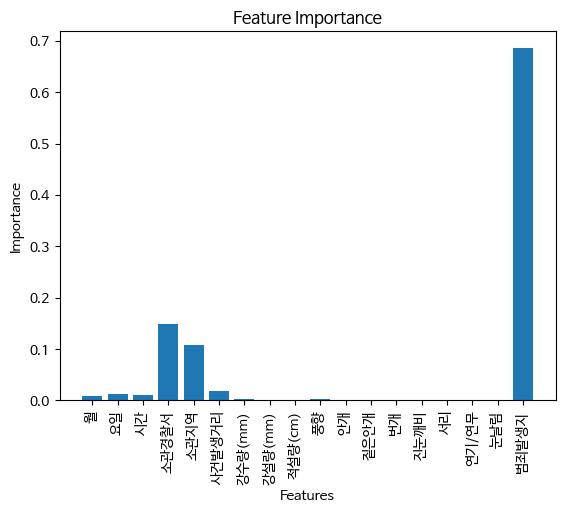

In [9]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
feature_names = x_train.columns
plt.rc('font', family='NanumBarunGothic')
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()